# A Regressão Linear
- Se temos um conjunto de pontos mostrados abaixo, podemos traçar qualquer reta que passa por esses pontos
<br>
    - Nesse caso vamos traçar uma reta y = x

In [63]:
from sklearn.model_selection import train_test_split 


- A regressão linear vai traçar essa reta da melhor forma a minimizar a soma do erros ao quadrado, segundo a própria documentação: 
<br><br>
    - https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

In [64]:
#importando a base de dados 
import pandas as pd

dados = pd.DataFrame({
    "X":[1,2,3,4,5],
    "Y":[1.3,1.8,3.5,4,4.6]
})

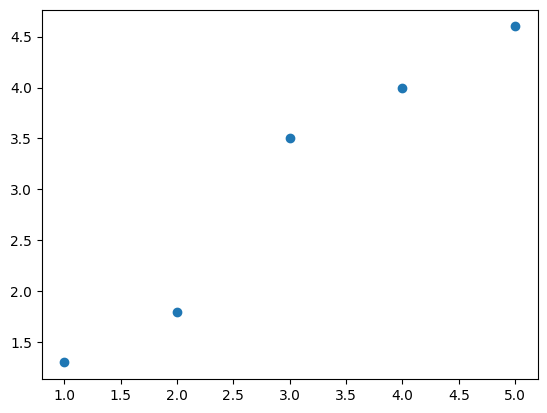

In [65]:
# Visualizando esses pontos graficamente, podemos traçar uma reta que passa por esses pontos

import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.scatter(dados.X,dados.Y)

plt.show()

In [66]:
#Nessa reta vermelha, fizemos que y = x,então podemos escrever o y_reta como

dados['y_reta'] = dados.X 
dados

,X,Y,y_reta
0,1,1.3,1
1,2,1.8,2
2,3,3.5,3
3,4,4.0,4
4,5,4.6,5


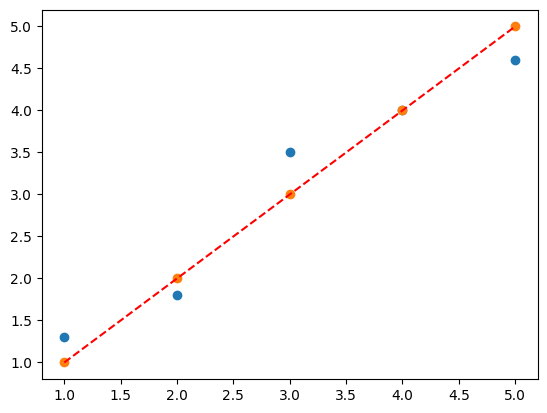

In [67]:
# visualizando os pontos graficamente, podemos traçar uma reta que passa por esse ponto

import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.scatter(dados.X,dados.Y)
ax.plot(dados.X,dados.y_reta,'--r')
ax.scatter(dados.X,dados.y_reta)

plt.show()

- vamos usar a regressão linear para traçar a melhor reta que passa por esses pontos


In [68]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [69]:
# Criando o regressor
reg = LinearRegression().fit(dados.X.values.reshape(-1,1),dados.Y)

In [70]:
# Visualizando o Coeficiente Angular
a = reg.coef_

In [71]:
# e o Coeficiente Linear
b = reg.intercept_ 

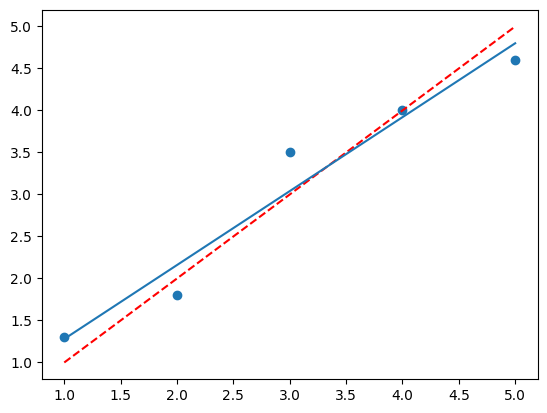

In [72]:
#visualizando graficamente

fig,ax = plt.subplots()

ax.scatter(dados.X,dados.Y)
ax.plot(dados.X,dados.y_reta,'--r')

x = dados.X.values
y = a * x + b

ax.plot(x,y)

plt.show()

In [73]:
# fazendo previsão e adicionando na base
dados['y_pred'] = reg.predict(dados.X.values.reshape(-1,1))

In [74]:
dados

,X,Y,y_reta,y_pred
0,1,1.3,1,1.28
1,2,1.8,2,2.16
2,3,3.5,3,3.04
3,4,4.0,4,3.92
4,5,4.6,5,4.80


In [75]:
# Calculando o erro da reta vermelha e da regressão
dados['erro_reta'] = (dados.Y - dados.y_reta)**2
dados['erro_pred'] = (dados.Y - dados.y_pred)**2


In [76]:
#verificando essa bas e a soma do erro
dados[['erro_reta','erro_pred']].mean()

erro_reta    0.1080
erro_pred    0.0776
dtype: float64

-  Podemos usar o erro médio absoluto e o erro médio quadrático do próprio scikit-learn para calcular esses erros

In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [78]:
# Visualizando o resultado da previsão
print(mean_absolute_error(dados.Y,dados.y_reta))
print (mean_squared_error(dados.Y,dados.y_reta))

print(mean_absolute_error(dados.Y,dados.y_pred))
print (mean_squared_error(dados.Y,dados.y_pred))

#tanto o erro médio absoluto, quando o erro quadratico médio é menor utilizando o modelo de regressão linear


0.2800000000000001
0.10800000000000005
0.22400000000000003
0.07760000000000003


#### Usando a Regressão Linear de forma prática
- vamos utilizar o dataset de casas da califórnia

In [79]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [80]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [81]:
#transformando em um dataframe
casas = pd.DataFrame(data.data)
casas.columns = data.feature_names
casas['MedHouseVal'] = data.target

In [82]:
#visualizando
casas

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [83]:
#separando o X e Y
X = casas.MedInc
y = casas.MedHouseVal

- separamos nossa base em treino e teste usando train_test_split

In [84]:
# importando o train_test_split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [85]:
# Usando a regressão Linear
reg = LinearRegression().fit(X_train.values.reshape(-1,1),y_train)

In [86]:
# Avaliando o erro
y_pred = reg.predict(X_test.values.reshape(-1,1))

print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.6265986453094173
0.7028461448540976


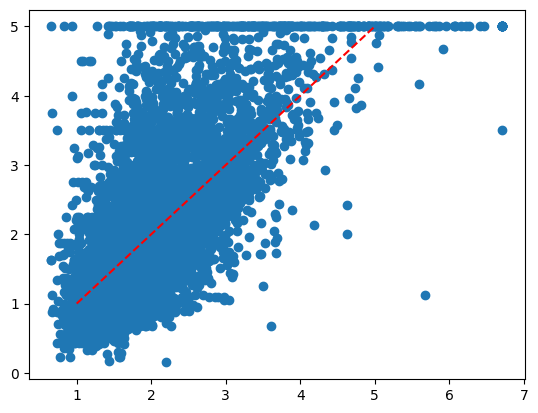

In [87]:
# Visualizando a relação do y_test com o y_pred

fig,ax = plt.subplots()

ax.scatter(y_pred,y_test)
ax.plot([1,5],[1,5],'--r')

plt.show()


- Regressão Linear Múltipla

Primeiro fazendo para apenas duas variáveis

In [96]:
#separando o X e Y
# x = casas.drop('MedHouseVal',axis=1)
x = casas[['MedInc','AveBedrms']]
y = casas.MedHouseVal


In [97]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [98]:
# Usando regressão Linear
reg = LinearRegression().fit(x_train,y_train)

In [99]:
# Da mesma forma, também ter o coef_
reg.coef_

array([0.41732849, 0.00059442])

In [100]:
reg.intercept_

0.44810749063254973

In [101]:
# Avaliando o erro
y_pred = reg.predict(x_test)

print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.6266005452778879
0.7028544349993665


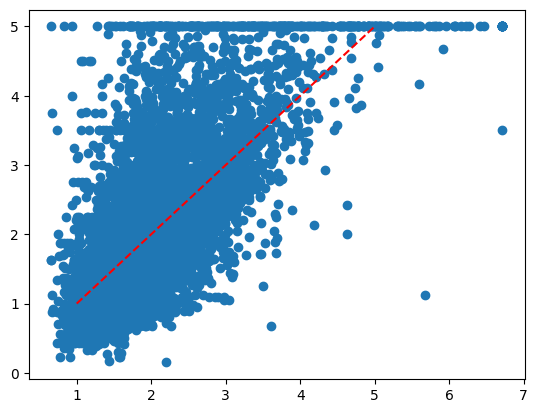

In [103]:
fig,ax = plt.subplots()

ax.scatter(y_pred,y_test)
ax.plot([1,5],[1,5],'--r')

plt.show()